In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('healthcare.csv')
del df['id']
df

In [ ]:
# 將 hypertension 和 heart_disease 轉換為 object 類型
df['hypertension'] = df['hypertension'].astype('object')
df['heart_disease'] = df['heart_disease'].astype('object')

df.info()

In [ ]:
import plotly.express as ex
from plotly.subplots import make_subplots


In [ ]:
fig = ex.pie(df,names='stroke')
fig.update_layout(title='Percentage of strokes<b>')
fig.show()

In [ ]:
from imblearn.over_sampling import SMOTE

stroke=Counter(df['stroke'])
classes=[]
count=[]   #list to store no of laels of each class
for i in stroke.keys():
    classes.append(i)
    count.append(stroke[i])
colors = ["#E58B8B","#7685A8"]
import plotly.express as ex



fig = ex.pie(df, names='stroke', color_discrete_sequence=colors)
fig.update_layout(title='Percentage of strokes<b>')
fig.show()

plt.figure(figsize=(4, 4))

plt.pie(
    count,
    labels=classes,
    shadow=True,
    colors=colors,
    startangle=50,
    autopct='%1.1f%%'
)
plt.axis('equal')
plt.tight_layout()
plt.title("Percentage of strokes", fontsize=20)
plt.show()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
pyo.init_notebook_mode()
from imblearn.over_sampling import SMOTE
import scikitplot as skplt


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import os

from sklearn.metrics import classification_report,confusion_matrix,f1_score
import warnings
warnings.filterwarnings('ignore')

plt.rc('figure',figsize=(17,13))
sns.set_context('paper',font_scale=2)

def set_seed(seed=31415):
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

In [ ]:
fig = make_subplots(
    rows=2, cols=2,subplot_titles=('','<b>Distribution Of Female Ages<b>','<b>Distribution Of Male Ages<b>','Residuals'),
    vertical_spacing=0.09,
    specs=[[{"type": "pie","rowspan": 2}       ,{"type": "histogram"}] ,
           [None                               ,{"type": "histogram"}]            ,
          ]
)
fig.add_trace(
    go.Pie(
        values=df.gender.value_counts().values,
        labels=['<b>Female<b>','<b>Male<b>','<b>Other<b>'],
        hole=0.3,
        pull=[0,0.08,0.3],
        marker_colors=[(255,192,203),(173,216,230),(144,238,144)],
        textposition='inside'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(
        x=df.query('gender=="Female"').age,
        marker=dict(color=(255,192,203)),
        name='Female Ages'
    ),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(
        x=df.query('gender=="Male"').age,
        marker=dict(color=(173,216,230)),
        name='Male Ages'
    ),
    row=2, col=2
)


fig.update_layout(
    height=800,
    showlegend=True,
    title_text="<b>Age-Sex Infrence<b>",
)

fig.show()

In [ ]:
fig, ax=plt.subplots(nrows=6, ncols=2, figsize=(20, 30))
fig.tight_layout(h_pad=9, w_pad=7)

sns.countplot(x=df.gender, ax=ax[0][0])
info_text="Female: "+str(df.gender.value_counts().Female)+"\nMale: "+str(df.gender.value_counts().Male)+"\nOther: "+str(df.gender.value_counts().Other)
ax[0][0].legend(title=info_text, labels=[])
ax[0][0].set_xlabel("Gender")
ax[0][0].set_ylabel("Count")
ax[0, 0].set_title("Gender", fontsize=20)

sns.histplot(df.age, ax=ax[0, 1], kde=True)
ax[0, 1].set_xlabel("Age")
ax[0, 1].set_ylabel("Count")
ax[0, 1].set_title("Age", fontsize=20)
plt.sca(ax[0, 1])
# plt.legend(labels=[], title="Line: Kernel Density Estimation")

sns.countplot(x=df.hypertension, ax=ax[1, 0])
plt.sca(ax[1, 0])
plt.xticks([0, 1], ["No", "Yes"])
info_text="No: "+str(df.hypertension.value_counts()[0])+"\nYes: "+str(df.hypertension.value_counts()[1])
plt.legend(labels=[], title=info_text)
ax[1, 0].set_xlabel("Answer")
ax[1, 0].set_ylabel("Count")
ax[1, 0].set_title("Hypertension", fontsize=20)

sns.countplot(x=df.heart_disease, ax=ax[1, 1])
plt.sca(ax[1, 1])
plt.xticks([0, 1], ["No", "Yes"])
info_text="No: "+str(df.heart_disease.value_counts()[0])+"\nYes: "+str(df.heart_disease.value_counts()[1])
plt.legend(labels=[], title=info_text)
ax[1, 1].set_xlabel("Answer")
ax[1, 1].set_ylabel("Count")
ax[1, 1].set_title("Heart Disease", fontsize=20)

sns.countplot(x=df.ever_married, ax=ax[2, 0], order=["No", "Yes"])
ax[2, 0].set_xlabel("Answer")
ax[2, 0].set_ylabel("Count")
ax[2, 0].set_title("Ever Married?", fontsize=20)

plt.sca(ax[2, 1])
ax[2, 1].set_title("Work Type", fontsize=20)
df.work_type.value_counts().index
renamed_labels=['Private', 'Self Employed', 'Children', 'Government Jobs', 'Never Worked']
plt.pie(x=df.work_type.value_counts(), labels=renamed_labels, autopct="%1.1f%%",
        explode=df.work_type.nunique()*[.03])

plt.sca(ax[3, 0])
ax[3, 0].set_title("Residence Type", fontsize=20)
df.Residence_type.value_counts().index
plt.pie(x=df.Residence_type.value_counts(), labels=df.Residence_type.value_counts().index, autopct="%1.1f%%",
        explode=df.Residence_type.nunique()*[.03])

sns.histplot(x=df.avg_glucose_level, ax=ax[3, 1], kde=True)
ax[3, 1].set_title("Average Glucose Level In Blood", fontsize=20)
ax[3, 1].set_xlabel("Level")
ax[3, 1].set_ylabel("Count")

sns.histplot(x=df.bmi, kde=True, ax=ax[4, 0])
ax[4, 0].set_title("BMI", fontsize=20)
ax[4, 0].set_xlabel("")
ax[4, 0].set_ylabel("Count")

sns.countplot(x=df.smoking_status, ax=ax[4, 1])
plt.sca(ax[4, 1])
ax[4, 1].set_title("Smoking Status", fontsize=20)
ax[4, 1].set_xlabel("")
ax[4, 1].set_ylabel("Count")

plt.sca(ax[5, 0])
ax[5, 0].set_title("Stroke", fontsize=20)
plt.pie(x=df.stroke.value_counts(), labels=["No", "Yes"], autopct="%1.1f%%")

ax[5, 1].set_visible(False)

plt.show()

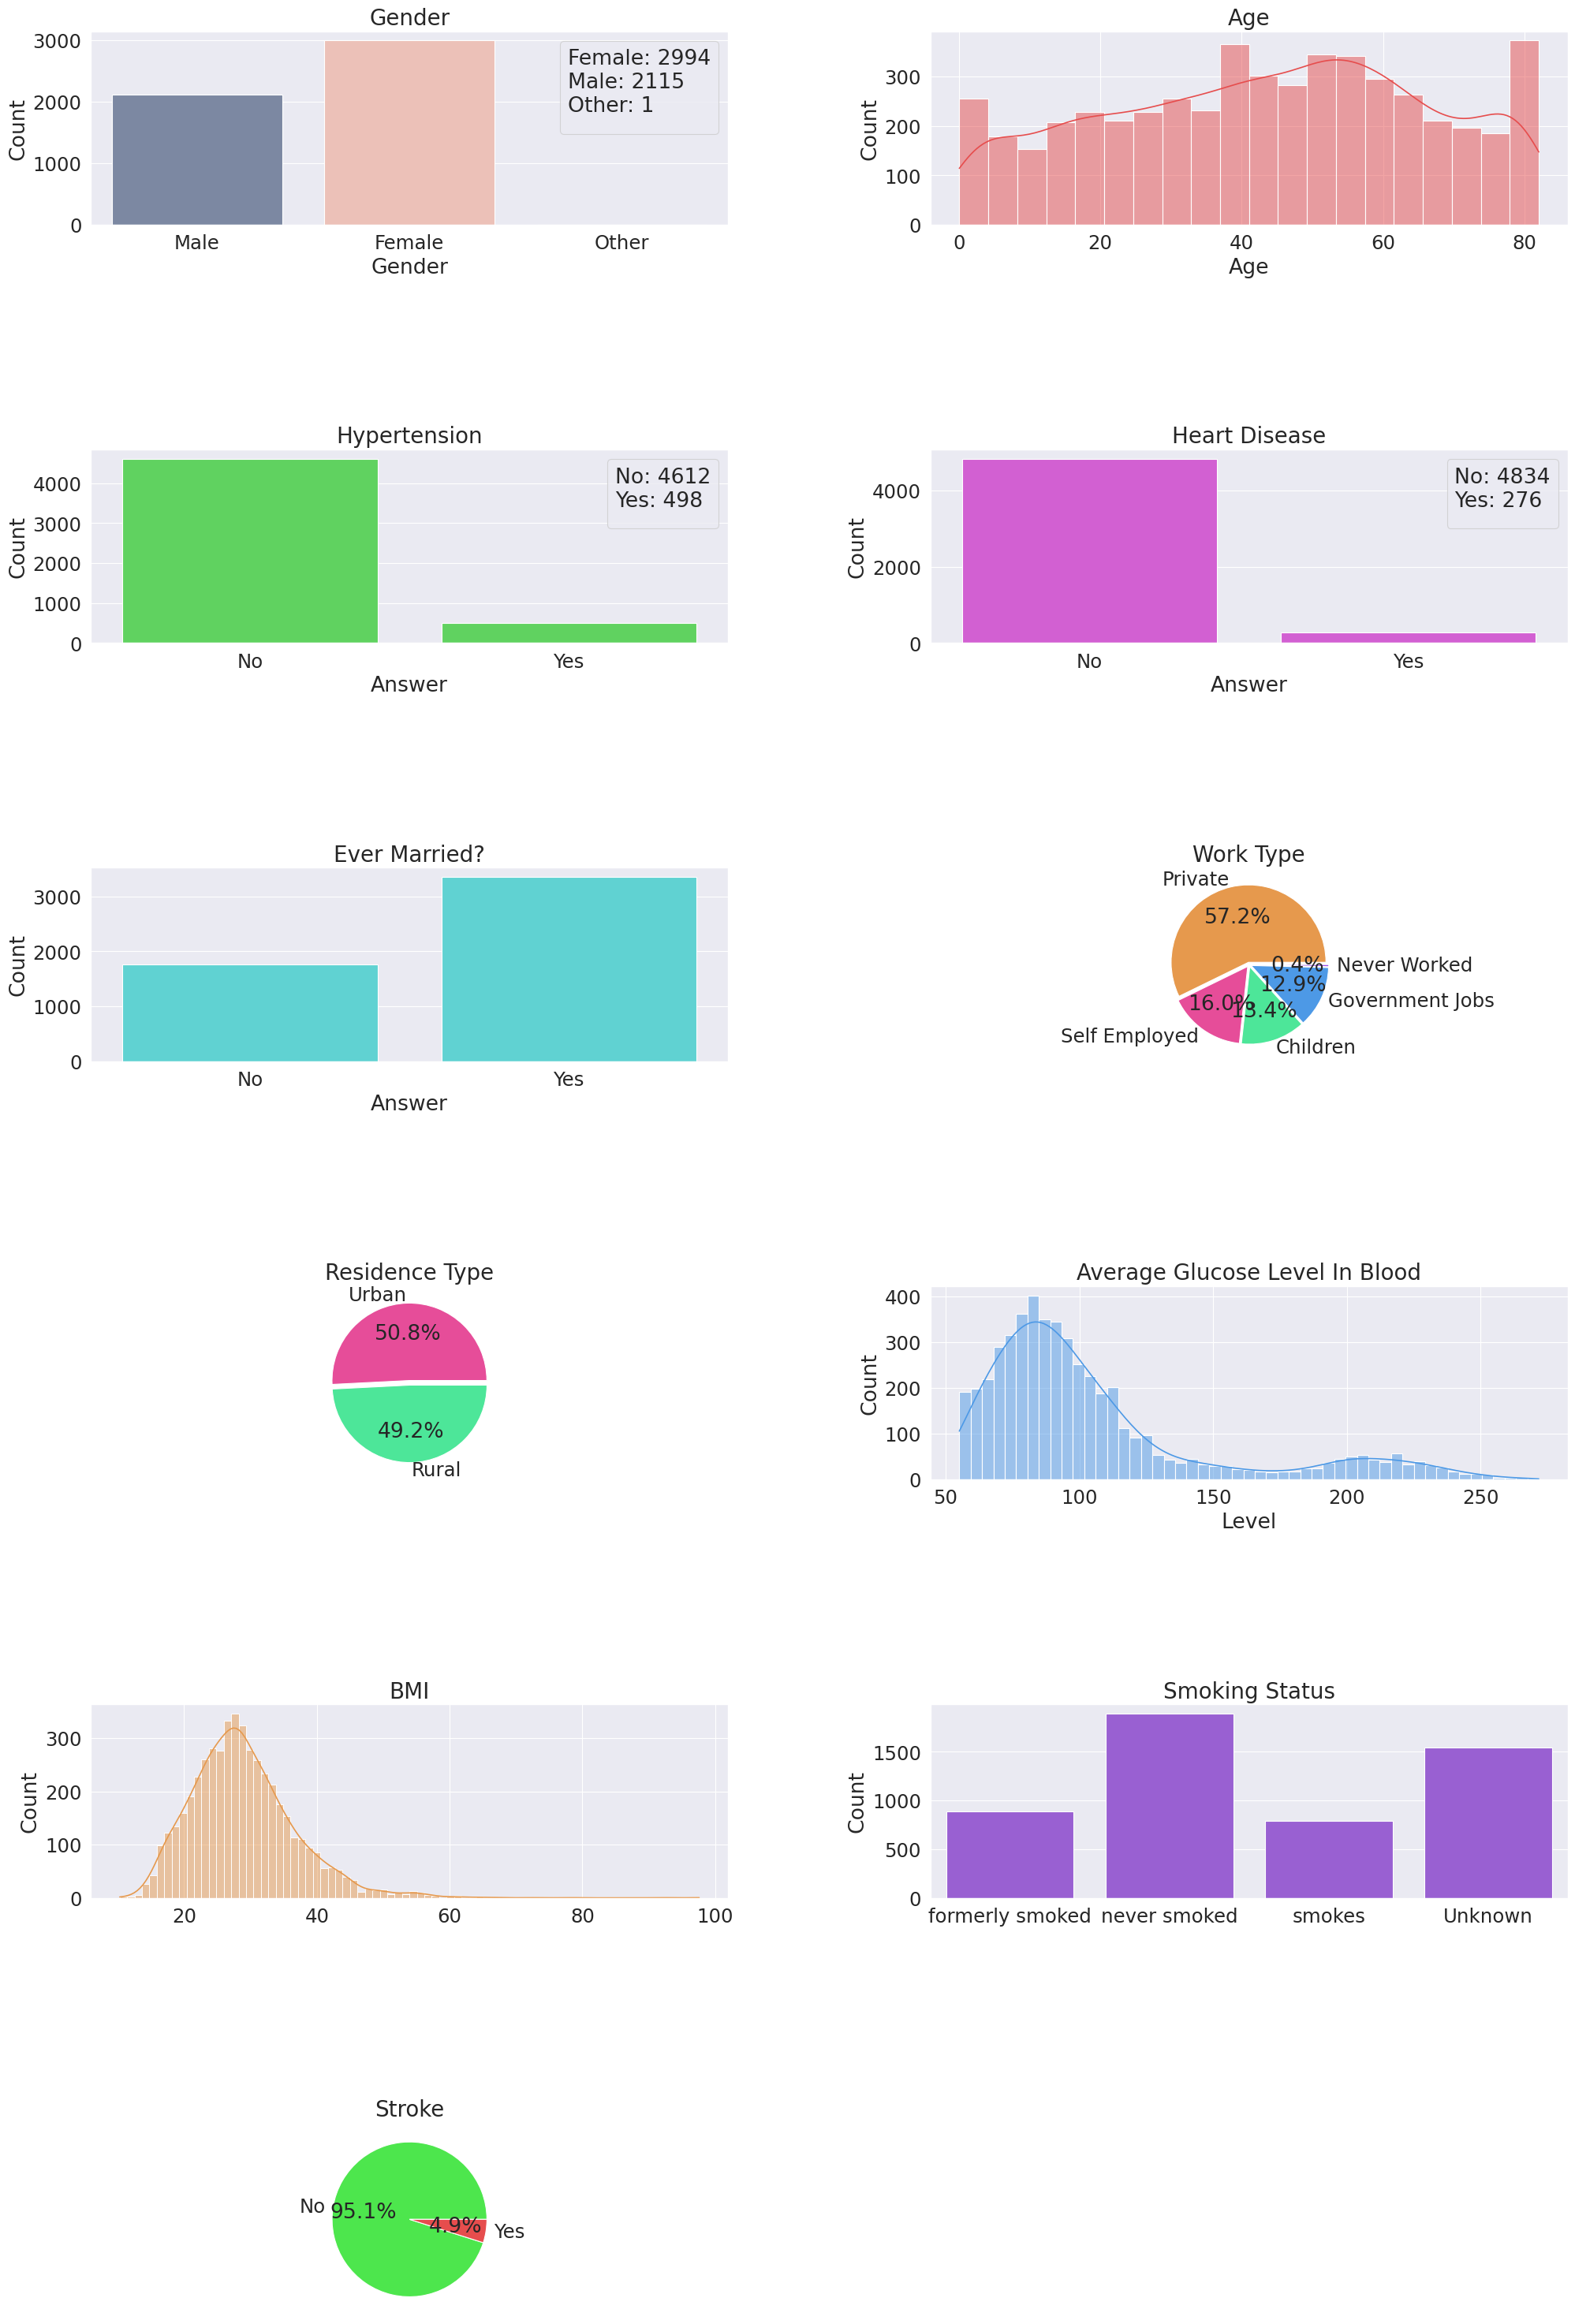

In [ ]:
fig, ax=plt.subplots(nrows=6, ncols=2, figsize=(20, 30))
fig.tight_layout(h_pad=9, w_pad=7)

# Define the colors
colors = ["#7685A8", "#F5BBAF"]

# Gender count plot with two colors
sns.countplot(x=df.gender, ax=ax[0][0], palette=colors)
info_text="Female: "+str(df.gender.value_counts().Female)+"\nMale: "+str(df.gender.value_counts().Male)+"\nOther: "+str(df.gender.value_counts().Other)
ax[0][0].legend(title=info_text, labels=[])
ax[0][0].set_xlabel("Gender")
ax[0][0].set_ylabel("Count")
ax[0, 0].set_title("Gender", fontsize=20)

# Age histogram
sns.histplot(df.age, ax=ax[0, 1], kde=True, color=(0.9, 0.3, 0.3))
ax[0, 1].set_xlabel("Age")
ax[0, 1].set_ylabel("Count")
ax[0, 1].set_title("Age", fontsize=20)
plt.sca(ax[0, 1])

# Hypertension count plot
sns.countplot(x=df.hypertension, ax=ax[1, 0], palette=colors)
plt.sca(ax[1, 0])
plt.xticks([0, 1], ["No", "Yes"])
info_text="No: "+str(df.hypertension.value_counts()[0])+"\nYes: "+str(df.hypertension.value_counts()[1])
plt.legend(labels=[], title=info_text)
ax[1, 0].set_xlabel("Answer")
ax[1, 0].set_ylabel("Count")
ax[1, 0].set_title("Hypertension", fontsize=20)

# Heart disease count plot
sns.countplot(x=df.heart_disease, ax=ax[1, 1], palette=colors)
plt.sca(ax[1, 1])
plt.xticks([0, 1], ["No", "Yes"])
info_text="No: "+str(df.heart_disease.value_counts()[0])+"\nYes: "+str(df.heart_disease.value_counts()[1])
plt.legend(labels=[], title=info_text)
ax[1, 1].set_xlabel("Answer")
ax[1, 1].set_ylabel("Count")
ax[1, 1].set_title("Heart Disease", fontsize=20)

# Ever married count plot
sns.countplot(x=df.ever_married, ax=ax[2, 0], order=["No", "Yes"], palette=colors)
ax[2, 0].set_xlabel("Answer")
ax[2, 0].set_ylabel("Count")
ax[2, 0].set_title("Ever Married?", fontsize=20)

# Work type pie chart
plt.sca(ax[2, 1])
ax[2, 1].set_title("Work Type", fontsize=20)
df.work_type.value_counts().index
renamed_labels=['Private', 'Self Employed', 'Children', 'Government Jobs', 'Never Worked']
plt.pie(x=df.work_type.value_counts(), labels=renamed_labels, autopct="%1.1f%%",
        explode=df.work_type.nunique()*[.03], colors=[(0.9, 0.6, 0.3), (0.9, 0.3, 0.6), (0.3, 0.9, 0.6), (0.3, 0.6, 0.9), (0.6, 0.3, 0.9)])

# Residence type pie chart
plt.sca(ax[3, 0])
ax[3, 0].set_title("Residence Type", fontsize=20)
df.Residence_type.value_counts().index
plt.pie(x=df.Residence_type.value_counts(), labels=df.Residence_type.value_counts().index, autopct="%1.1f%%",
        explode=df.Residence_type.nunique()*[.03], colors=[(0.9, 0.3, 0.6), (0.3, 0.9, 0.6)])

# Average glucose level histogram
sns.histplot(x=df.avg_glucose_level, ax=ax[3, 1], kde=True, color=(0.3, 0.6, 0.9))
ax[3, 1].set_title("Average Glucose Level", fontsize=20)
ax[3, 1].set_xlabel("Level")
ax[3, 1].set_ylabel("Count")

# BMI histogram
sns.histplot(x=df.bmi, kde=True, ax=ax[4, 0], color=(0.9, 0.6, 0.3))
ax[4, 0].set_title("BMI", fontsize=20)
ax[4, 0].set_xlabel("")
ax[4, 0].set_ylabel("Count")

# Smoking status count plot
sns.countplot(x=df.smoking_status, ax=ax[4, 1], color=(0.6, 0.3, 0.9))
plt.sca(ax[4, 1])
ax[4, 1].set_title("Smoking Status", fontsize=20)
ax[4, 1].set_xlabel("")
ax[4, 1].set_ylabel("Count")

# Stroke pie chart
plt.sca(ax[5, 0])
ax[5, 0].set_title("Stroke", fontsize=20)
plt.pie(x=df.stroke.value_counts(), labels=["No", "Yes"], autopct="%1.1f%%", colors=[(0.3, 0.9, 0.3), (0.9, 0.3, 0.3)])

# Hide last subplot
ax[5, 1].set_visible(False)

plt.show()